#### Data Spliting using Dask
 - we are regenerate the previous splitted dataset 
 - but now with the help of python dask, a library that help parallel processing and scale up the task
 
###### Library needed
- dask



In [1]:
import pandas as pd
import time
import datetime
import dask

In [2]:
from dask.distributed import Client, LocalCluster
cluster = LocalCluster(n_workers=1, threads_per_worker=4, memory_limit = '2GB')
client = Client(cluster)
client

Client Scheduler: tcp://127.0.0.1:56334 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 1 Cores: 4 Memory: 2.00 GB


##### Lets load the dataset into dask data frame
Previously the load time was 5.82s with pandas dataframe
Lets see if dask can reduce the time or not

In [3]:
%%time

import dask.dataframe as dd

df = dd.read_csv("feb.csv")
df


Wall time: 325 ms


,callsign,number,icao24,registration,typecode,origin,destination,firstseen,lastseen,day,latitude_1,longitude_1,altitude_1,latitude_2,longitude_2,altitude_2
npartitions=6,,,,,,,,,,,,,,,,
,object,object,object,object,object,object,object,object,object,object,float64,float64,float64,float64,float64,float64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


### we see dask load the dataframe into 480ms
but there are empty values. 

So it does not load the complete dataset

dask will load the dataset when we ask for a result

and the function is compute()

##### In Dask dataframe Structure we can see it has 6 partition and 6 task
from previous [Spliting_dataset.ipynb](https://github.com/fahimabrar/High-Performance-Computer-Infrastructure/blob/main/Spliting_dataset.ipynb) we know our data shape for february is (1617845, 16)

Lets print a partition of our dask dataframe

In [4]:
df.partitions[0].compute()

,callsign,number,icao24,registration,typecode,origin,destination,firstseen,lastseen,day,latitude_1,longitude_1,altitude_1,latitude_2,longitude_2,altitude_2
0,CSN495,CZ495,781941,NaN,NaN,KLAX,EHAM,2021-01-31 00:05:56+00:00,2021-02-01 05:51:26+00:00,2021-02-01 00:00:00+00:00,33.933792,-118.417427,0.0,52.290779,4.741464,160.02
1,ABW713,NaN,424467,NaN,NaN,UUEE,LEZG,2021-01-31 01:02:37+00:00,2021-02-01 05:39:24+00:00,2021-02-01 00:00:00+00:00,55.958267,37.343445,914.4,41.660901,-1.021026,266.70
2,AZV536,NaN,42445d,NaN,NaN,UUWW,UUWW,2021-01-31 02:40:13+00:00,2021-02-01 08:12:46+00:00,2021-02-01 00:00:00+00:00,55.605670,37.326736,609.6,55.656459,37.311115,556.26
3,CKS538,K4538,a96b14,N706CK,B744,KMIA,KMIA,2021-01-31 03:26:47+00:00,2021-02-01 01:19:19+00:00,2021-02-01 00:00:00+00:00,25.788124,-80.269274,0.0,25.785285,-80.333690,11155.68
4,LCO1100,UC1100,a6cf20,N538LA,NaN,KMIA,KMIA,2021-01-31 04:06:06+00:00,2021-02-01 03:55:40+00:00,2021-02-01 00:00:00+00:00,25.787566,-80.275493,0.0,25.785424,-80.330114,106.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321701,IAD904,NaN,800be9,VT-HYD,A320,VAJJ,NaN,2021-02-06 14:25:07+00:00,2021-02-06 14:49:46+00:00,2021-02-06 00:00:00+00:00,19.088326,72.844249,304.8,16.389038,73.568212,7246.62
321702,LPE2377,NaN,e80214,CC-BGA,B789,SPJC,NaN,2021-02-06 14:25:08+00:00,2021-02-06 14:35:16+00:00,2021-02-06 00:00:00+00:00,-12.042040,-77.104026,0.0,-12.883987,-77.089502,6012.18
321703,ABW547,RU547,4240b6,VP-BIG,B744,UUEE,VHHH,2021-02-06 14:25:09+00:00,2021-02-07 01:58:52+00:00,2021-02-07 00:00:00+00:00,55.964493,37.372159,914.4,22.297073,113.900707,-30.48
321704,IGO6167,NaN,800d2b,NaN,NaN,NaN,VABB,2021-02-06 14:25:09+00:00,2021-02-06 15:07:16+00:00,2021-02-06 00:00:00+00:00,15.775772,73.553129,11582.4,19.089024,72.884799,37673.28


## we get 321706 rows that is one sixth of our full dataset


so these partition will help us to do parallel operation

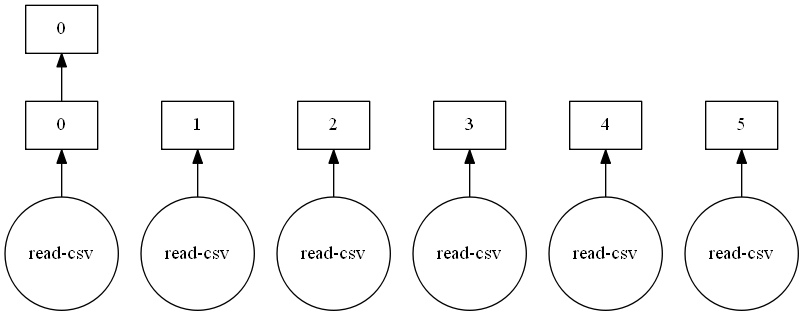

In [5]:
df.partitions[0].visualize()

In [6]:
df.partitions[1].compute()

,callsign,number,icao24,registration,typecode,origin,destination,firstseen,lastseen,day,latitude_1,longitude_1,altitude_1,latitude_2,longitude_2,altitude_2
0,VTE3102,LF3102,a04183,N11526,E135,KBWI,NaN,2021-02-06 14:25:14+00:00,2021-02-06 15:54:26+00:00,2021-02-06 00:00:00+00:00,39.173941,-76.676025,0.0,33.344742,-83.083447,3970.02
1,FROZN06,NaN,ae060e,83-0491,C130,NaN,NZCH,2021-02-06 14:25:15+00:00,2021-02-06 15:28:36+00:00,2021-02-06 00:00:00+00:00,-47.894852,171.750298,7010.4,-43.496875,172.522954,0.00
2,GAJ903,NaN,ac7c21,N903UP,NaN,KHPN,NaN,2021-02-06 14:25:16+00:00,2021-02-06 18:08:19+00:00,2021-02-06 00:00:00+00:00,41.098206,-73.735657,609.6,39.545563,-105.963314,6096.00
3,N488LF,NaN,a60751,N488LF,NaN,PA68,KPHL,2021-02-06 14:25:17+00:00,2021-02-06 14:50:42+00:00,2021-02-06 00:00:00+00:00,40.650833,-75.287964,0.0,39.937683,-75.137756,30.48
4,N74DX,NaN,a9f092,NaN,NaN,NaN,KHEF,2021-02-06 14:25:20+00:00,2021-02-06 16:30:11+00:00,2021-02-06 00:00:00+00:00,36.163873,-85.840272,3657.6,38.754971,-77.538269,251.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321652,GLO4105,G34105,e49270,PR-GEJ,B737,NaN,SBGR,2021-02-12 09:30:13+00:00,2021-02-12 10:06:17+00:00,2021-02-12 00:00:00+00:00,-25.934671,-47.895267,10058.4,-23.443817,-46.505377,822.96
321653,DOC23,NaN,47c01e,NaN,NaN,ENZV,NaN,2021-02-12 09:30:15+00:00,2021-02-12 09:43:42+00:00,2021-02-12 00:00:00+00:00,58.951566,5.731548,-304.8,59.373562,5.873424,213.36
321654,SKV7485,KV7485,c00b86,C-FEJL,E75S,NaN,CYYZ,2021-02-12 09:30:15+00:00,2021-02-12 11:53:37+00:00,2021-02-12 00:00:00+00:00,47.925568,-60.596947,9144.0,43.665394,-79.617201,22.86
321655,IGO6139,NaN,80139c,NaN,NaN,VOBL,NaN,2021-02-12 09:30:17+00:00,2021-02-12 09:53:47+00:00,2021-02-12 00:00:00+00:00,13.189453,77.716338,914.4,15.701232,78.154482,9235.44


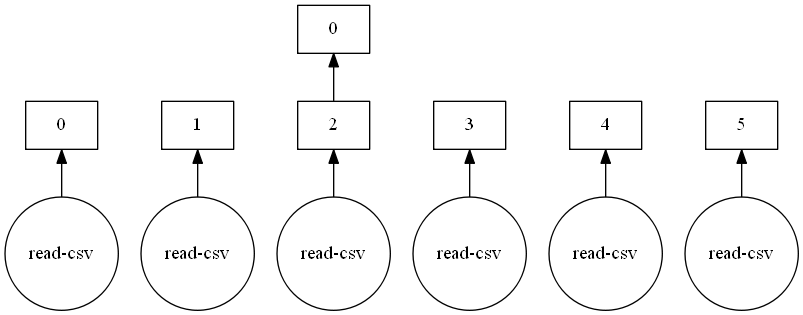

In [7]:
df.partitions[2].visualize()

In [8]:
#df.groupby('day').x.mean().compute()
#### custom funciton for formatting the date as same as the covid dataset

def date_format(x):
    return x.str.split()[0][0]

In [9]:
%%time
df.day = df.day.map_partitions(date_format)
#df.map_partitions(date_format, columns=["day"]).compute(scheduler='processes')
#master_df["day"].apply(date_format)

Wall time: 7 ms


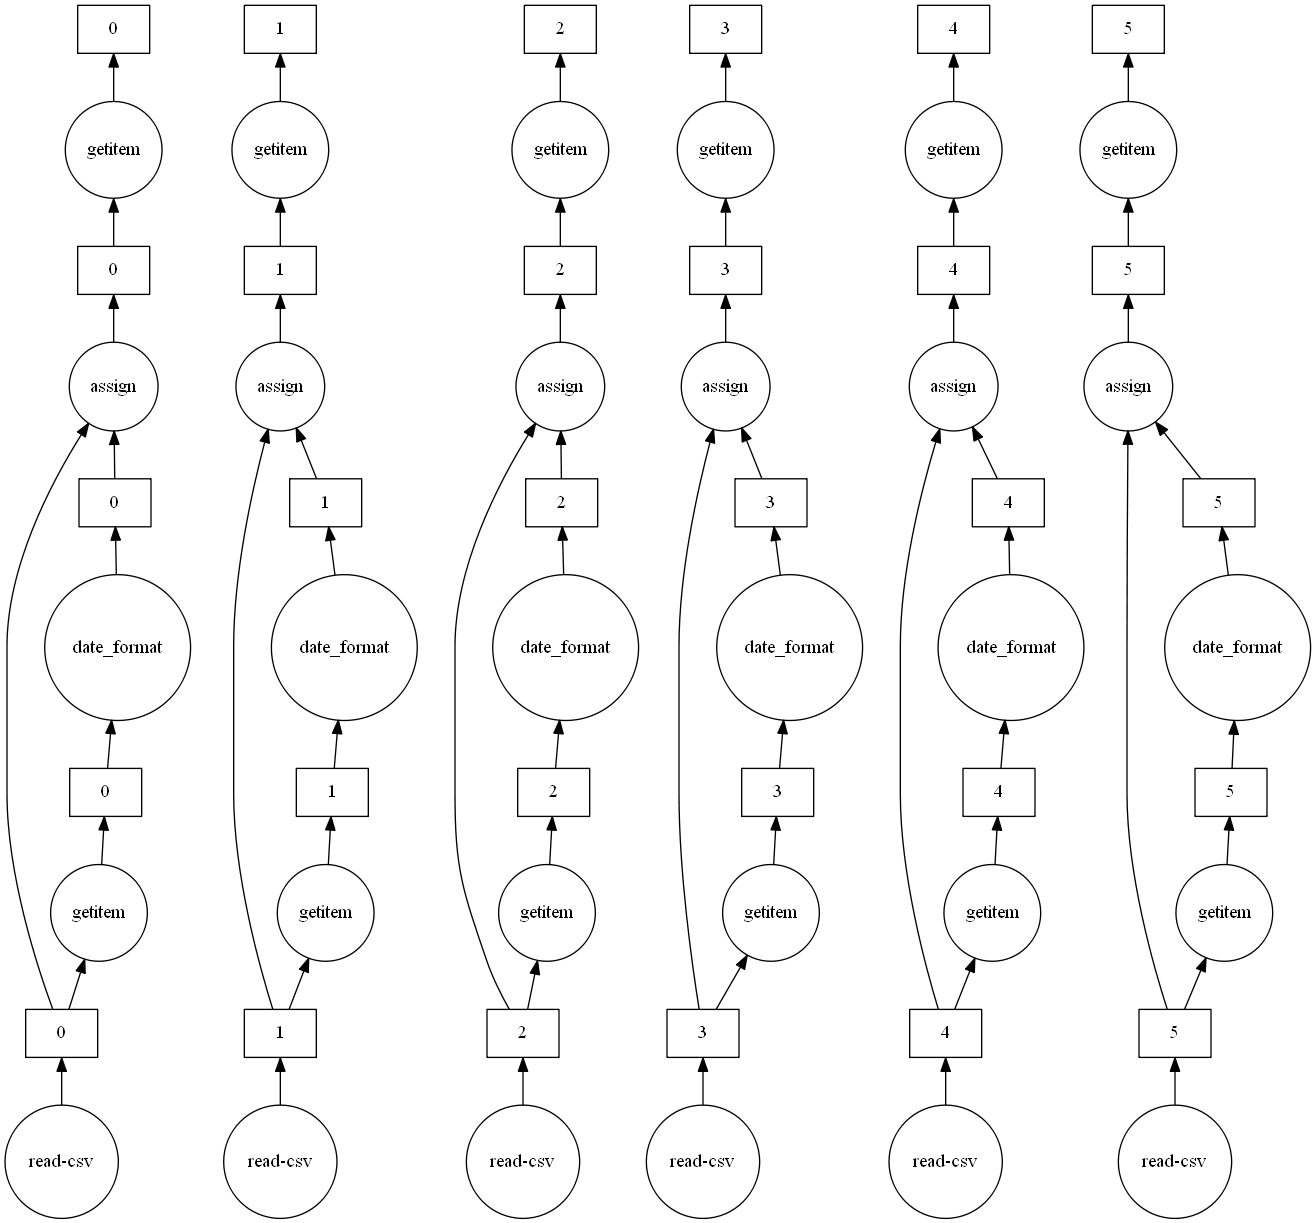

In [10]:
df.day.visualize()

In [11]:
df.head()

,callsign,number,icao24,registration,typecode,origin,destination,firstseen,lastseen,day,latitude_1,longitude_1,altitude_1,latitude_2,longitude_2,altitude_2
0,CSN495,CZ495,781941,NaN,NaN,KLAX,EHAM,2021-01-31 00:05:56+00:00,2021-02-01 05:51:26+00:00,2021-02-01,33.933792,-118.417427,0.0,52.290779,4.741464,160.02
1,ABW713,NaN,424467,NaN,NaN,UUEE,LEZG,2021-01-31 01:02:37+00:00,2021-02-01 05:39:24+00:00,2021-02-01,55.958267,37.343445,914.4,41.660901,-1.021026,266.70
2,AZV536,NaN,42445d,NaN,NaN,UUWW,UUWW,2021-01-31 02:40:13+00:00,2021-02-01 08:12:46+00:00,2021-02-01,55.605670,37.326736,609.6,55.656459,37.311115,556.26
3,CKS538,K4538,a96b14,N706CK,B744,KMIA,KMIA,2021-01-31 03:26:47+00:00,2021-02-01 01:19:19+00:00,2021-02-01,25.788124,-80.269274,0.0,25.785285,-80.333690,11155.68
4,LCO1100,UC1100,a6cf20,N538LA,NaN,KMIA,KMIA,2021-01-31 04:06:06+00:00,2021-02-01 03:55:40+00:00,2021-02-01,25.787566,-80.275493,0.0,25.785424,-80.330114,106.68


In [12]:
%%time
dfd = df[['destination', 'day', 'latitude_2', 'longitude_2']]
dfs = df[[ 'origin','day', 'latitude_1', 'longitude_1']]

Wall time: 8 ms


In [13]:
%%time
dfs.compute()
dfd.compute()

Wall time: 17 s


,destination,day,latitude_2,longitude_2
0,EHAM,2021-02-01,52.290779,4.741464
1,LEZG,2021-02-01,41.660901,-1.021026
2,UUWW,2021-02-01,55.656459,37.311115
3,KMIA,2021-02-01,25.785285,-80.333690
4,KMIA,2021-02-01,25.785424,-80.330114
...,...,...,...,...
8719,ID68,2021-02-28,43.486168,-116.441868
8720,KIWA,2021-02-28,33.295074,-111.646637
8721,CYCD,2021-02-28,49.178741,-123.939725
8722,NaN,2021-02-28,13.746414,121.903160


In [14]:
%%time
dask.config.set(scheduler='processes')
dask.delayed(dfs.to_csv("dask_source.csv", single_file = True))
dask.delayed(dfd.to_csv("dask_destination.csv", single_file = True))

Wall time: 38.4 s


Delayed('list-19572169-6a4e-4581-b62c-47ce88c564db')

In [15]:
%%time
dask.config.set(scheduler='threads')
dask.delayed(dfs.to_csv("dask_source.csv", single_file = True))
dask.delayed(dfd.to_csv("dask_destination.csv", single_file = True))

Wall time: 38.7 s


Delayed('list-ff37e2d8-bfb2-4b8f-8813-98419f24171f')

### Conclusion

- dask loads dataset into different partition
- for time format conversion it shows promising result
- where pandas apply funcion took 524 ms it takes only 5-8 ms, nearly 100 times faster
- dask is not performing well for index slicing
- and not performing better than pandas for writing a csv file
- we tried with both threads and processess schedulers